In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Redmi\anaconda3\envs\da_practicum_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Анализ аварийных ситуаций в США 2022 года

Целью данного проекта является анализ данных об авариях, произошедших в США в 2022 году, с целью выявления инсайтов и закономерностей, которые могут помочь в принятии мер по снижению количества аварий, включая улучшение дорожной инфраструктуры, введение ограничений при определенных условиях, улучшение погодных прогнозов и других мер безопасности. Путем проведения исследовательского анализа мы стремимся выяснить, как географические факторы, серьезность ущерба, время суток и другие факторы влияют на количество произошедших аварий. А также, предполагаем оценить обстановку с авариями в США в целом.

* Первый набор данных (road_accidents) представляет собой общенациональную информацию о дорожно-транспортных происшествиях в 49 штатах США. Собираясь с февраля 2016 года по конец 2022, он объединяет данные от разных источников, включая API-интерфейсы, которые предоставляют потоковую информацию о событиях трафика. Эти интерфейсы передают информацию о дорожных событиях от различных организаций, таких как транспортные департаменты США и штатов, правоохранительные органы, дорожные камеры и датчики трафика.
* Во втором датасете (population) содержатся названия городов и количество населения в них.

Датасет road_accidents достаточно большой (около 7,7 млн строк), поэтому читать его будем порциями, а затем работать с данными только за 2022 год.

<pre>
План работы:
Шаг 1. Загрузка данных 
Шаг 2. Предобработка данных  
    2.1 Проверить пропуски и дубликаты  
    2.2 Привести названия столбцов к змеиному типу  
    2.3 Выделить столбик с месяцем аварии
    2.4 Оценить полноту данных 
Шаг 3. Исследовательский анализ  
    3.1 Анализ степени серьезности аварий (severity):  
        3.1.1 Определить наиболее часто встречающуюся степень серьезности аварий.  
        3.1.2 Проанализировать зависимость между степенью серьезности и погодными условиями  
        3.1.3 Проанализировать зависимость между степенью серьезности и временем суток  
    3.2 Определить, какие погодные условия чаще всего сопровождают аварии.  
        3.2.2 Исследовать связь между погодными условиями и количеством аварий  
        3.3.3 Исследовать связь между температурой воздуха и количеством аварий  
    3.3 Географические особенности:  
        3.2.1 Изучить распределение аварий по городам, штатам и странам.  
        3.3.2 Определить наиболее аварийные местности и выявить причины их повышенной аварийности.  
        3.3.3 Влияние времени суток на аварии:  
    3.4 Проанализировать количество аварий в зависимости от времени суток (день/ночь).  
        3.4.1 Определить, возможно ли сезонное влияние на частоту происшедших аварий.  
        3.4.2 Влияние дополнительных факторов на аварии:  
    3.5 Оценить, как наличие различных объектов и удобств в близлежащих местах (например, перекрестков, светофоров, станций) влияет на количество аварий.  
    3.6 Проанализировать, как световые условия влияют на количесвто аварий:  
        3.6.1 Проанализировать различия в количестве аварий в зависимости от периода дня (день/ночь) и световых условий (гражданские, морские, астрономические сумерки).
</div>

## Предобработка данных.

In [7]:
# укажем путь к датасетам
road_accidents = "D:\\проекты порт\\US_Accidents_March23.csv"
population_path = "D:\\проекты порт\\population of USA cities.xlsx"

In [8]:
#загрузим датасет с населением в городах
population = pd.read_excel(population_path)
#посмотрим на него
print(population.head())

     Name, city Population
0      New York  8 244 936
1   Los Angeles  3 884 319
2       Chicago  2 695 615
3       Houston  2 195 984
4  Philadelphia  1 526 026


В датасете population необходимо привести названия столбцов к единому типу.

In [4]:
# Чтаем данные порциями с использованием параметра chunksize
chunk_size = 100000  # Указываем подходящий размер порции
chunks = pd.read_csv(road_accidents, chunksize=chunk_size)

# подсчет общего числа строк в файле
total_rows = 0

# Обработка данных в цикле
for chunk in chunks:
    total_rows += len(chunk)

# Вывод общего числа строк в файле
print("Общее число строк в файле:", total_rows)


Общее число строк в файле: 7728394


In [5]:
chunk_size = 100000
chunks = pd.read_csv(road_accidents, chunksize=chunk_size)

# Выберем первую порцию данных и выведем ее содержимое
first_chunk = next(chunks)
print(first_chunk.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

В датасете road_accidents также необходимо привести название столбцов к единому типу.

In [12]:
# Создаём пустой список, чтобы хранить отфильтрованные части данных
filtered_chunks = []

# Проходёмся по каждой части данных, применим операции с датами и фильтрацию
for chunk in chunks:
    # Преобразуем столбец 'Start_Time' в тип datetime
    chunk['Start_Time'] = pd.to_datetime(chunk['Start_Time'])
    # Создаём условие фильтрации для получения строк за 2022 год
    condition = (chunk['Start_Time'].dt.year == 2022)
    # Применим условие фильтрации к текущей части данных
    filtered_chunk = chunk[condition]
    # Если есть хотя бы одна строка удовлетворяющая условию, добавим отфильтрованную часть данных в список
    if not filtered_chunk.empty:
        filtered_chunks.append(filtered_chunk)

# Проверим, что хотя бы одна часть данных удовлетворяет условию фильтрации
if len(filtered_chunks) > 0:
    # Объединим отфильтрованные части данных в один DataFrame
    df_2022 = pd.concat(filtered_chunks)
else:
    print("Нет данных за 2022 год.")


In [13]:
# Создаём новый DataFrame, копируя данные из отфильтрованного DataFrame
road_accidents = df_2022.copy()

In [22]:
# приведём названия столбцов к единому типу
road_accidents.columns = [x.lower().replace(' ', '_') for x in road_accidents.columns]
population.columns = [x.lower().replace(', ', '_') for x in population.columns]

In [23]:
#посмотрим информацию о датафреймах
print("Информация о road_accidents:", road_accidents.info())
print('*' *50)
print("Информация о population:", population.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762452 entries, 512217 to 5423496
Data columns (total 46 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   source                 object        
 2   severity               int64         
 3   start_time             datetime64[ns]
 4   end_time               object        
 5   start_lat              float64       
 6   start_lng              float64       
 7   end_lat                float64       
 8   end_lng                float64       
 9   distance(mi)           float64       
 10  description            object        
 11  street                 object        
 12  city                   object        
 13  county                 object        
 14  state                  object        
 15  zipcode                object        
 16  country                object        
 17  timezone               object        
 18  airport_code     

In [24]:
print("Дубликаты в road_accidents:", road_accidents.duplicated().sum())
print('*' *50)
print("Дубликаты в population:",population.duplicated().sum())


Дубликаты в road_accidents: 0
**************************************************
Дубликаты в population: 0


<pre>
Всего в датафрейме road_accidents 1762452, то есть столько аварий было за 2022 год. Полных дубликатов нет в обоих датасетах.

Расшифруем содержание столбцов в road_accidents:
id - идентификатор аварии
source - источник, сообщивший об аварии
severity - степень серьёзности (от 1 до 4)
start_time - время начала аварии
end_time - время конца аварии
start_lat - начальная широта
start_lng  - начальная долгота
end_lat  - конечная широта
end_lng  - конечная долгота
distance(mi) - Протяженность дороги, затронутой аварией, в милях
description - описание аварии
street - улица
city - город
county - 
state - штат
zipcode - индекс
country  - страна
timezone - часовой пояс
airport_code - код аэропорта
weather_timestamp - время наблюдения за погодой
temperature(F) -  температура воздуха (в Фаренгейтах).
wind_chill(F) - холод ветра (по Фаренгейту).
humidity(%) -  влажность (в процентах).
pressure(in) - давление воздуха (в дюймах).
visibility(mi) -  видимость (в милях).
wind_direction -  направление ветра.
wind_speed(mph) - скорость ветра (в милях в час).
precipitation(in) - количество осадков в дюймах, если они есть.
weather_condition - погодные условия (дождь, снег, гроза, туман и т.д.).
amenity - наличие удобств в близлежащем месте
bump - наличие лежачего полицейского
crossing - наличие перекрестка в близлежащем месте.
give_way - наличие знака Уступи дорогу
junction - наличие перекрестка в соседнем месте.
no_exit
railway - наличие поблизости железной дороги.
roundabout - наличие кольцевой развязки поблизости.
station - наличие станции поблизости
stop - наличие остановки поблизости.
traffic_calming
traffic_signal - сигнал светофора
turning_loop
sunrise_sunset - период дня (т.е. день или ночь) в зависимости от восхода/захода солнца.
civil_twilight - период дня (т.е. день или ночь) на основе гражданских сумерек.
nautical_twilight - период дня (т.е. день или ночь) на основе морских сумерек.
astronomical_twilight - период дня (т.е. день или ночь) на основе астрономических сумерек.

Расшифруем содержание столбцов в population:
name_city - название города
population - количество горожан

In [ ]:
display("пропусков в road_accidents:", road_accidents.isna().sum())
display("пропусков в population:", population.isna().sum())

'пропусков в road_accidents:'

id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  236182
end_lng                  236182
distance(mi)                  0
description                   0
street                     7236
city                         65
county                        0
state                         0
zipcode                     307
country                       0
timezone                   1713
airport_code               7199
weather_timestamp         29595
temperature(f)            38718
wind_chill(f)             54508
humidity(%)               41107
pressure(in)              33134
visibility(mi)            41953
wind_direction            48385
wind_speed(mph)           48377
precipitation(in)         64475
weather_condition         38688
amenity                       0
bump                          0
crossing

'пропусков в population:'

name_city     0
population    0
dtype: int64

<pre>
В столбцах end_lat и end_lng 236182 пропусков, скорее всего, потому что во время аварии машины не перемещались, а остановились на месте.
7236 пропусков с названиями улиц, пока ничего с ними делать не будем.
Есть пропуски в zipcode, timezone и airport_code - эти столбцы не нужны, их удалим.
Достаточно много пропусков в столбцах с данными о погоде и сумерках, там значения NaN (это указано в документации датасета). 
В столбце city есть 65 пропусков, это совсем маленькое значение, поэтому удалим строки с пропущенными городами.

In [25]:
# Удаление строк с пропущенными значениями в столбце 'город'
road_accidents = road_accidents.dropna(subset=['city'])

In [26]:
#удалим из датасета столбцы, которые нам точно не нужны
road_accidents = road_accidents.drop(['source', 'zipcode', 'no_exit', 'traffic_calming', 'turning_loop'], axis=1)

## Исследовательский анализ

#### Оценка сезонности

512217   2022-09-08 05:49:30
512218   2022-09-08 02:02:05
512219   2022-09-08 05:14:12
512220   2022-09-08 06:22:57
512221   2022-09-08 06:36:20
Name: start_time, dtype: datetime64[ns]
512217    9
512218    9
512219    9
512220    9
512221    9
Name: month, dtype: int64


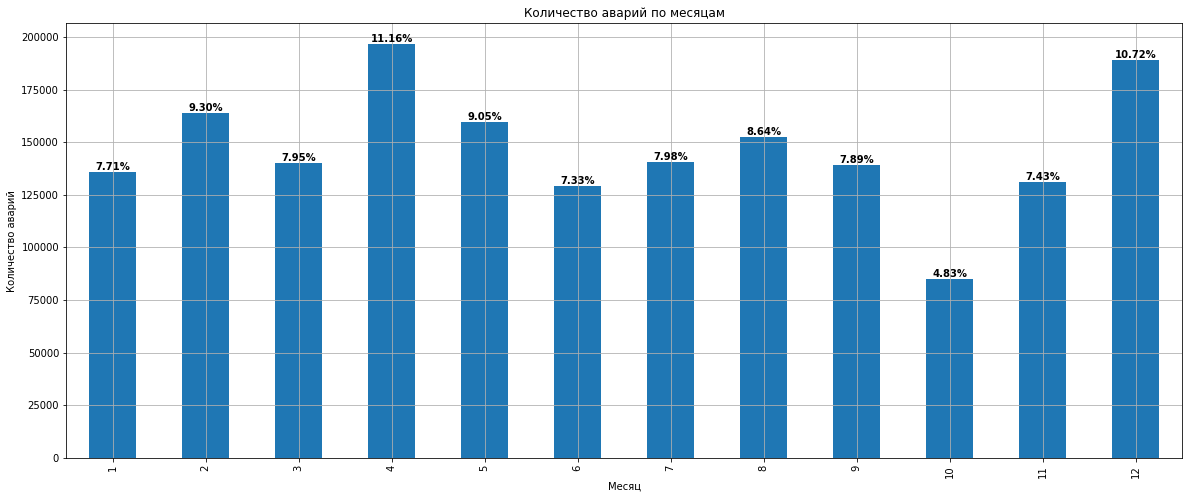

В среднем 8.33 % аварий месяц


In [28]:
# посмотирим столбец со временем и датой начала аварий
print(road_accidents['start_time'].head())
# создадим столбец с месяцами
road_accidents['month'] = pd.DatetimeIndex(road_accidents['start_time']).month
print(road_accidents['month'].head())
#создадим столбец с общим количеством аварий
total = road_accidents['id'].count()
# сгруппируем по месяцам и посчитаем количество
severity_count = road_accidents.groupby('month')['id'].count()
#выделим колинчство аварий в процентах для каждого месяца
percentage = (severity_count / total) * 100
# Построим график
ax = severity_count.plot(kind='bar', grid=True, figsize=(20, 8))
ax.set_xlabel('Месяц')
ax.set_ylabel('Количество аварий')
ax.set_title('Количество аварий по месяцам')
# Добавление надписей с процентами на столбцах
for i, v in enumerate(severity_count):
    ax.text(i, v + 1, f"{percentage[severity_count.index[i]]:.2f}%", ha='center', va='bottom', fontweight='bold') 
# Отображение графика
plt.show()
#посмотрим среднее количество аварий в месяц
print("В среднем", round(percentage.mean(), 2), "% аварий месяц")

Мы имеем полные данные за 2022 год. Больше всего аварий было в апреле и декабре (примерно на 3% больше от среднего). Возможно, это связано с тем, что декабрь и апрель переходные месяца и сопровождаются плохой погодой (гололёд, ледяные дожди, ливни и др.). Меньше всего аварий было в октябре (на 3,5% меньше, чем в среднем). Остальные значения незачительно отклоняются от среднего.

#### Оценка близлежащих объектов

Столбцы, с информацией о наличии близлежащих объектов:
* amenity - наличие удобств (?)
* crossing - наличие перекрестка в соседнем месте
* bump - наличие лежачего полицейского
* give_way - наличие знака уступи дорогу
* junction - наличие перекрестка в соседнем месте
* no_exit - 
* railway - наличие поблизости железной дороги.
* roundabout - наличие кольцевой развязки поблизости.
* station - наличие станции поблизости
* stop - наличие остановки поблизости. Эти столбцы хранят булевы значения

In [31]:
def objects(b):
    count = 0
    for i in b:
        if i == True:
            count += 1 
    return count

amenity= objects(road_accidents['amenity'])
print("наличие удобств в близлежащем месте", amenity)
bump= objects(road_accidents['bump'])
print("наличие лежачего полицейского", bump)
crossing= objects(road_accidents['crossing'])
print("наличие перекрестка", crossing)
give_way= objects(road_accidents['give_way'])
print("наличие знака уступи дорогу", give_way)
junction= objects(road_accidents['junction'])
print("наличие перекрестка", junction)
railway= objects(road_accidents['railway'])
print("наличие поблизости железной дороги", railway)

наличие удобств в близлежащем месте 20336
наличие лежачего полицейского 996
наличие перекрестка 162365
наличие знака уступи дорогу 6173
наличие перекрестка 115001
наличие поблизости железной дороги 13042


In [32]:
162365+115001

277366

Столбцы crossing и junction содержат информацию о наличии перекрёстка, в общей сумме 277,37 тыс аварий произошли на перекрёстке - это достаточно большое количество. Очень мало аварий было около лежачего полицейского (996).

#### Анализ степени серьезности аварий

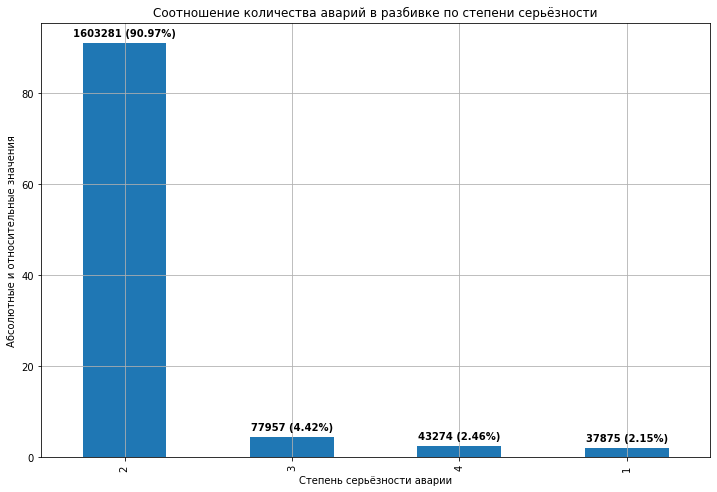

In [33]:
# Определим наиболее часто встречающуюся степень серьезности аварий.
severity_count = road_accidents['severity'].value_counts().sort_values(ascending=False)
# Рассчитаем проценты от общего количества для каждого значения 'severity'
severity_percentages = (severity_count / total) * 100
# Построение графика
ax = severity_percentages.plot(kind='bar', grid=True, figsize=(12, 8))
ax.set_xlabel('Степень серьёзности аварии')
ax.set_ylabel('Абсолютные и относительные значения')
ax.set_title('Соотношение количества аварий в разбивке по степени серьёзности')
# Добавление надписей с процентами и абсолютными значениями непосредственно на столбцах
for i, v in enumerate(severity_percentages):
    count = severity_count[severity_count.index[i]]  # Получаем абсолютное количество из severity_count
    ax.text(i, v + 1, f"{count} ({v:.2f}%)", ha='center', va='bottom', fontweight='bold')

# Отображение графика
plt.show()


Столбец severity, согласно документации датасета, указывает на влияние аварий на движение. 90% аварий - 2 степени серьёзности, то есть большинство аварий несильно влияли на пробки. Теперь посмотрим, как погодные условия на влияют на задержку движения.

In [34]:
#посмотрим, какая погода есть в нашем датасете
print(road_accidents['weather_condition'].unique())

['Fair' 'Mostly Cloudy' 'Partly Cloudy' 'Cloudy' nan 'Fog' 'Haze'
 'Light Rain' 'Thunder in the Vicinity' 'Rain' 'Heavy Rain'
 'Heavy Rain / Windy' 'Fair / Windy' 'Light Rain with Thunder' 'Smoke'
 'Thunder' 'Shallow Fog' 'Patches of Fog' 'Light Drizzle'
 'Showers in the Vicinity' 'T-Storm' 'Thunder / Windy'
 'Heavy T-Storm / Windy' 'Heavy T-Storm' 'Drizzle' 'Light Rain / Windy'
 'Mist' 'Mostly Cloudy / Windy' 'N/A Precipitation' 'Light Rain Shower'
 'Partly Cloudy / Windy' 'Cloudy / Windy' 'Drizzle and Fog'
 'T-Storm / Windy' 'Rain / Windy' 'Blowing Dust' 'Heavy Drizzle'
 'Smoke / Windy' 'Haze / Windy' 'Tornado' 'Light Snow' 'Snow'
 'Light Drizzle / Windy' 'Blowing Dust / Windy' 'Widespread Dust / Windy'
 'Wintry Mix' 'Light Snow / Windy' 'Wintry Mix / Windy'
 'Light Snow with Thunder' 'Fog / Windy' 'Snow and Thunder' 'Heavy Snow'
 'Light Snow Shower' 'Sleet' 'Light Snow and Sleet' 'Snow / Windy'
 'Rain Shower' 'Light Freezing Rain' 'Snow and Sleet' 'Light Sleet'
 'Light Freezing Driz

<pre>
Слишком много значений, выберем среди них наиболее опасные погодные условия: 
Tornado(Торнадо),
Squalls (шквалы) и Windy (сильный ветер)
Hail (град) и Small Hail (маленький град), 
все виды гололёда - Freezing Rain, Light Freezing Rain, Heavy Freezing Rain, 
ледяной дождь - Freezing Drizzle, Light Freezing Drizzle, Heavy Freezing Drizzle, Freezing Rain'
Гроза 'Thunder', 'Thunder in the Vicinity') и сильная гроза ('Heavy T-Storm', 'Heavy T-Storm / Windy')
Сильный дождь 'Heavy Rain', 'Heavy Rain / Windy') и проливные дожди ('Showers in the Vicinity'
Снег и мокрый снег ('Snow', 'Snow / Windy', 'Light Snow', 'Light Snow / Windy', 'Light Snow Shower', 'Light Snow Shower / Windy', 'Light Snow with Thunder', 'Heavy Snow', 'Heavy Snow / Windy', 'Heavy Snow with Thunder', 'Sleet', 'Light Snow and Sleet', 'Snow and Sleet', 'Sleet and Thunder'
Туман 'Fog', 'Fog / Windy', 'Shallow Fog', 'Shallow Fog / Windy'
Мгла 'Haze', 'Haze / Windy'
Дым 'Smoke', 'Smoke / Windy'

In [ ]:
#разобьём погодные условия на опасные и неопасные
# Список опасных погодных условий
dangerous_conditions = ['Tornado', 'Squalls', 'Windy', 'Hail', 'Small Hail', 'Freezing Rain', 'Light Freezing Rain',
                        'Heavy Freezing Rain', 'Freezing Drizzle', 'Light Freezing Drizzle', 'Heavy Freezing Drizzle',
                        'Thunder', 'Thunder in the Vicinity', 'Heavy T-Storm', 'Heavy T-Storm / Windy', 'Heavy Rain',
                        'Heavy Rain / Windy', 'Showers in the Vicinity', 'Snow', 'Snow / Windy', 'Light Snow',
                        'Light Snow / Windy', 'Light Snow Shower', 'Light Snow Shower / Windy', 'Light Snow with Thunder',
                        'Heavy Snow', 'Heavy Snow / Windy', 'Heavy Snow with Thunder', 'Sleet', 'Light Snow and Sleet',
                        'Snow and Sleet', 'Sleet and Thunder', 'Fog', 'Fog / Windy', 'Shallow Fog', 'Shallow Fog / Windy',
                        'Haze', 'Haze / Windy', 'Smoke', 'Smoke / Windy']

# Создание нового столбца 'dangerous weather conditions'
road_accidents['dangerous_weather_conditions'] = False  # Инициализируем все значения как False

# Проходим по столбцу weather_condition и устанавливаем True для опасных погодных условий
for index, condition in road_accidents['weather_condition'].iteritems():
    if condition in dangerous_conditions:
        road_accidents.at[index, 'dangerous_weather_conditions'] = True


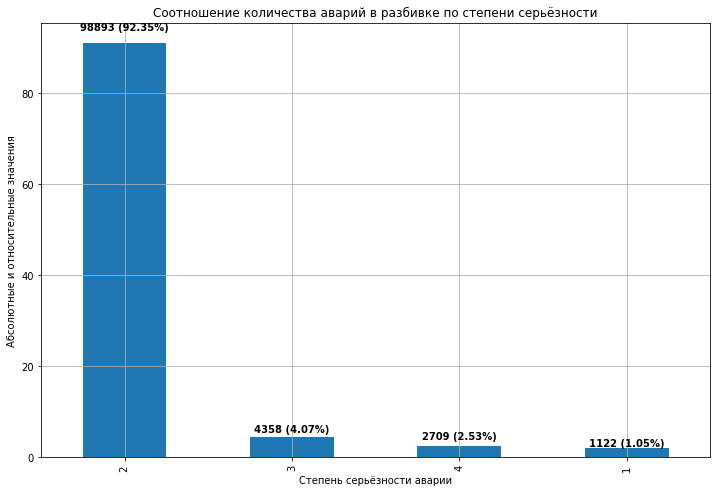

In [54]:
# изучим зависимоть между опасными погодными условиями и серьёзностью аварий
#оставим только инфу о авариях, произошедших при опасных погодных условиях
road_accidents_dangerous_weather=road_accidents.query('dangerous_weather_conditions ==True')
total = road_accidents_dangerous_weather['id'].count()
road_accidents_dangerous_weather_count = road_accidents_dangerous_weather.groupby('severity')['id'].count().sort_values(ascending=False)
# Рассчитаем проценты от общего количества для каждого значения 'severity'
percentages = (road_accidents_dangerous_weather_count / total) * 100
# Построение графика
ax = severity_percentages.plot(kind='bar', grid=True, figsize=(12, 8))
ax.set_xlabel('Степень серьёзности аварии')
ax.set_ylabel('Абсолютные и относительные значения')
ax.set_title('Соотношение количества аварий в разбивке по степени серьёзности')
# Добавление надписей с процентами и абсолютными значениями непосредственно на столбцах
for i, v in enumerate(percentages):
    count = road_accidents_dangerous_weather_count[road_accidents_dangerous_weather_count.index[i]]  # Получаем абсолютное количество из severity_count
    ax.text(i, v + 1, f"{count} ({v:.2f}%)", ha='center', va='bottom', fontweight='bold')

# Отображение графика
plt.show()

На 1.5% больше аварий 2 степени серьёзности, при этом на 1.1% уменьшилось количество аварий 1 степени, а 3 и 4 степени остались примерно на одном уровне. Небольшие колебания значений можно списать на случайность. Для точности можно провести статистический тест, но в данном случае нет такой необходимости, учитывая, что показатель степени серьёзности не критически важен. 
Можно сказать, что погодные условия не влияют на степень пробок в результате аварий.

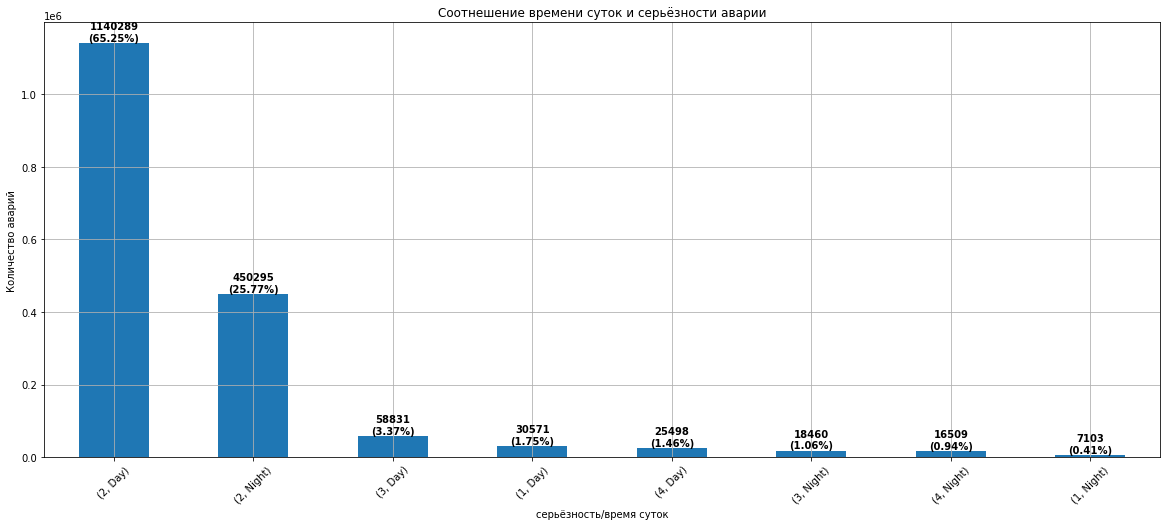

In [58]:
# Группируем данные по городам и подсчитываем количества аварий в каждом городе
def plot(value_5, value_6): 
    value_counts = road_accidents.groupby(value_5)[value_6].value_counts().sort_values(ascending=False).head(15)

    # Вычисляем общее количество аварий
    total = value_counts.sum()

    # Построение графика
    ax = value_counts.plot(kind='bar', grid=True, figsize=(20, 8))

    # Добавляем абсолютное значение и проценты в скобках
    for i, value_counts in enumerate(value_counts):
        percentage = (value_counts / total) * 100
        ax.text(i, value_counts, f"{value_counts}\n({percentage:.2f}%)", ha='center', va='bottom', fontweight='bold')

    # Настраиваем подписи и заголовки
    ax.set_xlabel('серьёзность/время суток')
    ax.set_ylabel('Количество аварий')
    ax.set_title('Соотнешение времени суток и серьёзности аварии')

    # Поворот подписей на оси x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    plt.show()

severity_times_of_day = plot(['severity'], ['sunrise_sunset'])

Больше всего было аварий 2 степени влияния на движение днём - 65%, а ночью 25.7%. Практически нет аварий самой лёгкой степени серьёзности. Значит, при каждой аварии влияние на движение было, хоть и небольшое. 

Выводы по разделу

### Какие погодные условия чаще всего сопровождают аварии

In [60]:
#посмотрим, сколько всего аварий было при опасных погодных условиях
print("Количество аварий при опасных погодных условиях:", road_accidents.query('dangerous_weather_conditions ==True')['id'].count())
#посмотрим % от общего числа аварий
print(round(road_accidents.query('dangerous_weather_conditions ==True')['id'].count()/road_accidents['id'].count()*100), "% аварий произошло при опасных погодных условиях")


Количество аварий при опасных погодных условиях: 107082
6 % аварий произошло при опасных погодных условиях


Можно предложить, что такой маленький процент аварий при опасных погодных условиях может говорить о том, что уже были предприняты определенные меры и инженерные решения для снижения аварийности в сложных погодных условиях. Однако, требуется более тчательный анализ для подтверждения или опровержения данной гипотезы. Посмотрим количество аварий в разную погоду:

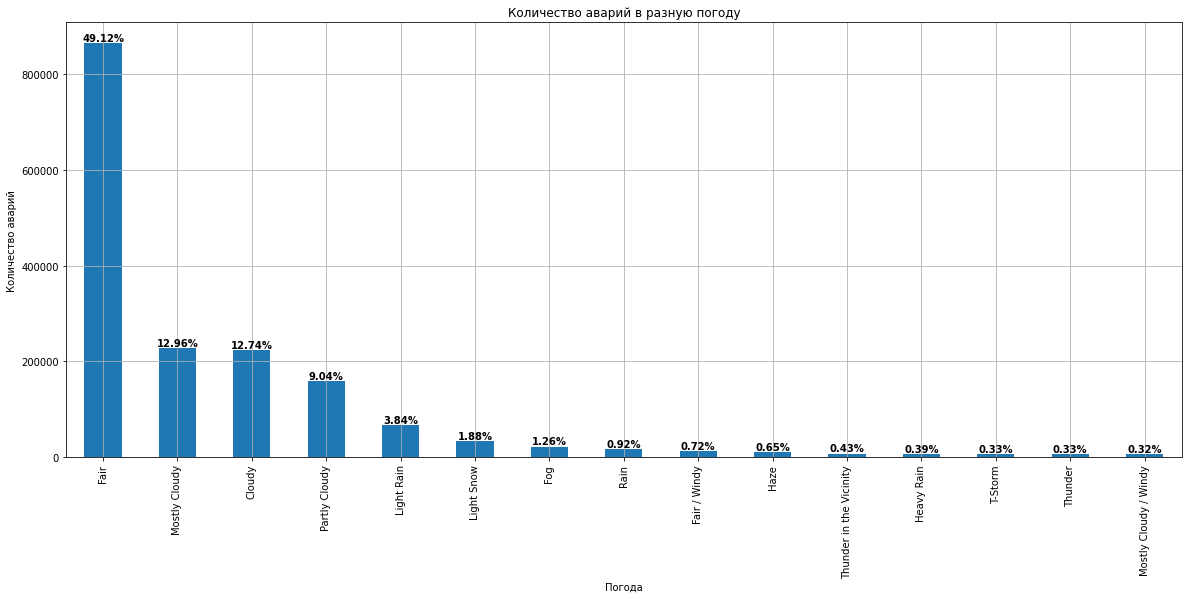

In [67]:
#посчитаем общее колиечство аварий
total= road_accidents['id'].count()
#сгруппируем по погодным условиям
road_accidents_different_weather = road_accidents.groupby('weather_condition')['id'].count().sort_values(ascending=False).head(15)
#рассчитаем проценты
percentage = (road_accidents_different_weather / total) * 100
# Построение графика
ax = road_accidents_different_weather.plot(kind='bar', grid=True, figsize=(20, 8))
ax.set_xlabel('Погода')
ax.set_ylabel('Количество аварий')
ax.set_title('Количество аварий в разную погоду')

# Добавление надписей с процентами непосредственно на столбцах
for i, v in enumerate(severity_count):
    ax.text(i, v + 1, f"{percentage[severity_count.index[i]]:.2f}%", ha='center', va='bottom', fontweight='bold') 
# Отображение графика
plt.show()

Почти половина аварий было в солнечную погоду. Тут сложно понять, насколько ясная погода влияет на аварийность, потому что большая часть аварий произошла днём, когда ясно, днём же наиболее активный поток движения (в ясную погоду скорее всего скороть выше и маштин больше), да и погода в США достаточно солнечная и тёплая. Важно помнить, что корреляция между погодными условиями и авариями не обязательно означает причинно-следственную связь. 

In [ ]:
#Исследовать связь между температурой воздуха и количеством аварий

### Географические особенности

In [68]:
# Убираем запятые и неразрывные пробелы из значений столбца 'population'
population['population'] = population['population'].str.replace(',', '').str.replace('\xa0', '').astype(int)
#проверим, произошли ли изменения
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name_city   100 non-null    object
 1   population  100 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ KB


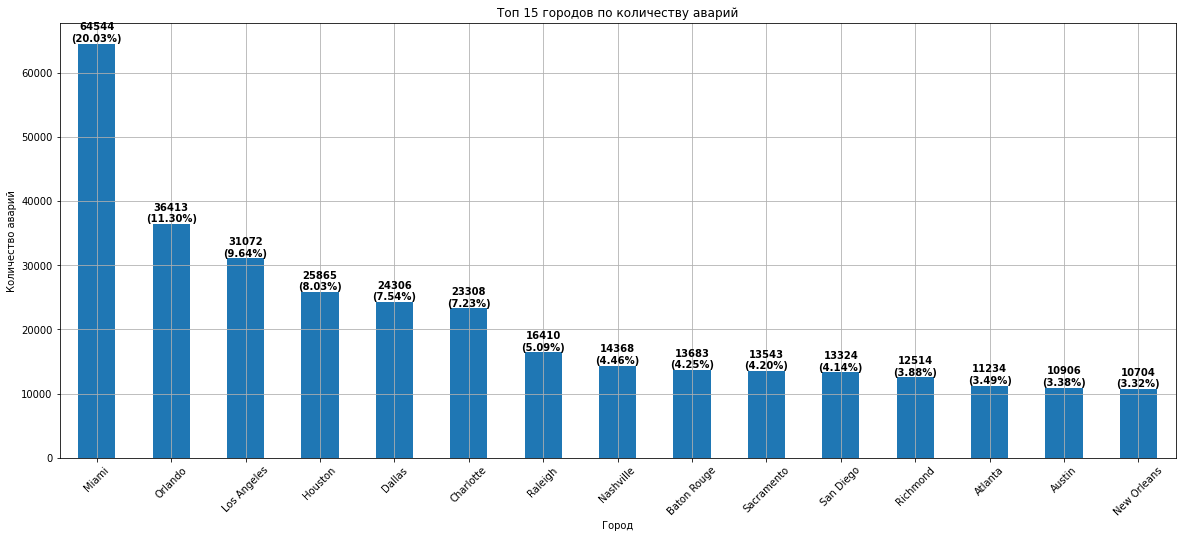

In [70]:
# Группируем данные по городам и подсчитываем количества аварий в каждом городе
city_accident_counts = road_accidents.groupby('city')['id'].count().sort_values(ascending=False).head(15)
# Вычисляем общее количество аварий
total_accidents = city_accident_counts.sum()
# Построение графика
ax = city_accident_counts.plot(kind='bar', grid=True, figsize=(20, 8))
# Добавляем абсолютное значение и проценты в скобках
for i, count in enumerate(city_accident_counts):
    percentage = (count / total_accidents) * 100
    ax.text(i, count, f"{count}\n({percentage:.2f}%)", ha='center', va='bottom', fontweight='bold')
# Настраиваем подписи и заголовки
ax.set_xlabel('Город')
ax.set_ylabel('Количество аварий')
ax.set_title('Топ 15 городов по количеству аварий')
# Поворот подписей на оси x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Больше всего аварий в Майами(20%), причём с сильным отрывом от других городов. Затем идут Орландо(11.3%), Лос Анджелес(9.6%), Хьюстон(8.3%) и Даллос(7.54%). Посмотрим количество населения по городам Топ-15. В этот список не вошёл самый густонаселённый город - Нью Йорк, для него посмотрим количество аварий отдельно.

In [ ]:
#посмотрим количество аварий в самом густонаселённом городе США - Нью-Йорке
new_df.query('city == "New York"')['id'].count()

7849

Для населения около 8,245 млн 7849 аварий за год - это очень маленькое количество. Нью Йорк можно назвать безопасным городом относительно дорожных происшествий. Теперь посмотрим, как обстоят дела в других городах.

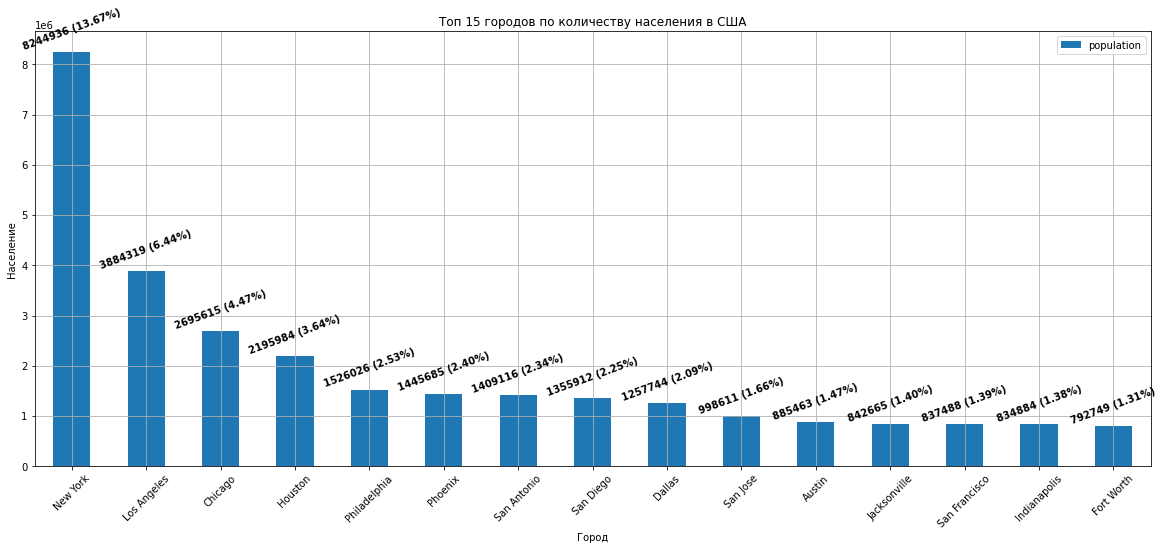

In [72]:
# Сумма населения всех городов
total_population = population['population'].sum()
# Сортируем данные по населению в порядке убывания и берем только топ-15 городов
top_15_cities = population.sort_values(by='population', ascending=False).head(15)
# Рассчитываем процент от общего населения для каждого города
top_15_cities['percentage'] = (top_15_cities['population'] / total_population) * 100
# Построение графика
ax = top_15_cities.plot(x='name_city', y='population', kind='bar', grid=True,figsize=(20, 8))
ax.set_xlabel('Город')
ax.set_ylabel('Население')
ax.set_title('Топ 15 городов по количеству населения в США')
# Добавление надписей с процентами и абсолютным количеством непосредственно на столбцах
for i, v in enumerate(top_15_cities['population']):
    percentage = top_15_cities.loc[top_15_cities.index[i], 'percentage']
    ax.text(i, v + 10000, f'{v} ({percentage:.2f}%)', ha='center', va='bottom', fontweight='bold', rotation=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

Больше всего жителей в Нью-Йорке(13.7%), затем идут Лос Анджелес(6.44%), Чикаго(4.5%) и Хьюстон(3.6%), в Даллосе - 2.1%.
В топ-15 не вошли Майами и Орландо - города с рекордным количеством аварий. Посмотрим количество населения там.

In [ ]:
population.query('name_city in ("Miami","Orlando")')[['name_city', 'population']]


,name_city,population
41,Miami,417738
70,Orlando,255575


Майми и Орландо достаточно небольшие города, странно, что там такое большое количество аварий. Посмотрим процент аварий для каждого штата и население по штатам. 

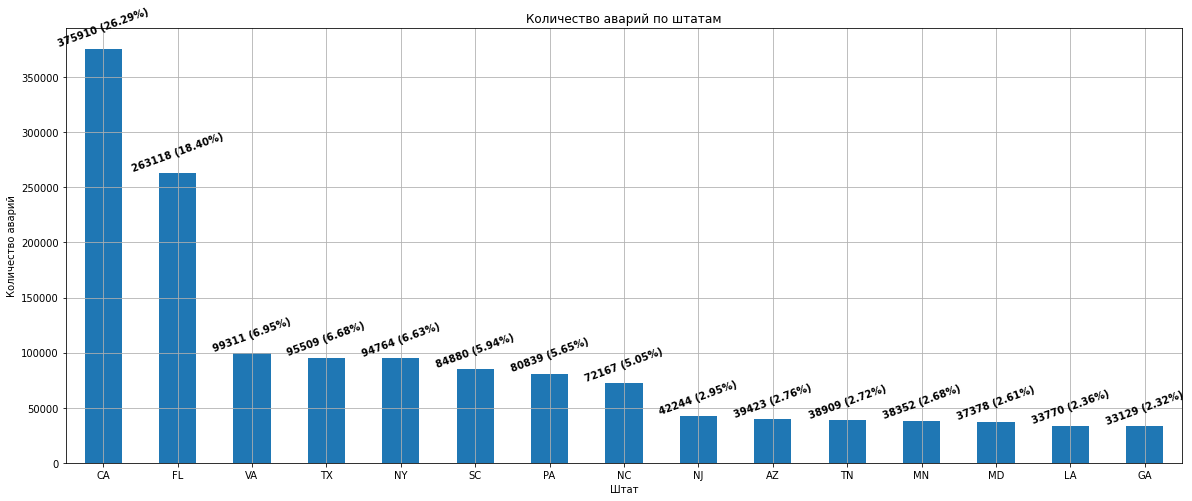

In [ ]:
# Количество аварий по штатам
state_accidents_count = road_accidents.groupby('state')['id'].count().sort_values(ascending=False).head(15)

# Создание графика
ax = state_accidents_count.plot(kind='bar', grid=True, figsize=(20, 8))

# Добавление надписей с процентами и абсолютным количеством непосредственно на столбцах
for i, v in enumerate(state_accidents_count):
    percentage = (v / state_accidents_count.sum()) * 100
    ax.text(i, v + 100, f'{v} ({percentage:.2f}%)', ha='center', va='bottom', fontweight='bold', rotation=20)

# Настройка осей и заголовка
ax.set_xlabel('Штат')
ax.set_ylabel('Количество аварий')
ax.set_title('Количество аварий по штатам')
# Поворот подписей на оси x
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

Больше всего аварий было в Калифорнии (26.3%) и Флориде(18.4), причём с большим отрывом от остальных штатов. На статистику во Флориде скорее всего влияют города, в которых больше всего аварий - Майами и Орландо. А вот для того, чтоб оценить ситуацию в Калифорнии и остальных штатах, необходимо посмотреть население по штатам. И оценить относительные значения.

Общая численность в каждом штате:
    
    соотнести кол-во жителей и количество аварий. (Какой процент в каждои штате?)

In [ ]:
# Удалить столбцы 'Column1' и 'Column2' из DataFrame df, чтоб создать датафрейм с погодой
#weather = new_df.drop(['source', 'start_Time', 'end_time', 'Start_Lat', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

Днём количество аварий больше в 2,5 раза, скорее всего это связано с интенсивностью движения. 

In [ ]:

# построить тепловую карту для всех числовых столбцов:
#correlation_matrix = weather.corr()

# Используем библиотеку Seaborn для построения тепловой карты
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Тепловая карта корреляции")
#plt.show()


In [73]:
#посмотреть, влияет ли время суток на количество аврий

In [ ]:
#twilight = new_df.drop(['Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition','Zipcode', 'Timezone', 'Airport_Code', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'], axis=1)

In [ ]:
#twilight.corr()

In [ ]:
correlation_2 = twilight.corr()
# Используем библиотеку Seaborn для построения тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Тепловая карта корреляции")
plt.show()